In [15]:
import numpy as np
import scipy as sc
from scipy.integrate import odeint
import matplotlib.pyplot as plt

import calendar
from datetime import datetime, date

# Initial conditions with input parameters

In [16]:
Rs= 19.33                              #in unit of solar radius
R0 = Rs*695700                         # unit is Km
V0=1273                                # unit is km/s

R_target= 1.0                          # target distance in AU
w=400                                  # which is ambient solar wind speed in unit of km/s 
Gamma=0.2
gamma=Gamma*10**(-7)                   # unit is km-1
Time_UTC=datetime(2012,10,27,16,54,0)    #input utc time in format (year,month,date,hr,minute,second)

In [17]:
# defining function for equation of motion

def dbm(x,t):
    r,v=x
    dxdt=[v,-gamma*(v-w)*np.abs(v-w)]
    return dxdt

In [18]:
# Solving equation of motion with given boundary conditions.
import datetime
ts = calendar.timegm(Time_UTC.timetuple())  #this command provide second correspond to given input time
t=np.arange(ts,ts+500000,0.1)
Time=[Time_UTC + datetime.timedelta(milliseconds=i*10) for i in range(len(t))]
Y0=[R0,V0]


Y=odeint(dbm,Y0,t)

R=Y[:,0]/695700             # from now onwards we take solar radius as unit of distance
V=Y[:,1]


# Forecasting

In [19]:
def find_nearest(d,v, value):
    from datetime import datetime, date
    array = np.asarray(d)
    idx = (np.abs(array - value)).argmin()
    v=float("{:.3f}".format(v[idx]))
    T=float("{:.3f}".format((t[idx]-t[0])/3600))
    T_Utc_date=datetime.utcfromtimestamp(t[idx]).strftime('%d %b %Y')
    T_Utc_time = datetime.utcfromtimestamp(t[idx]).time().strftime('%H:%M:%S')
    return T,v,T_Utc_date,T_Utc_time

A=find_nearest(R/215,V,R_target)

print("Transit time of CME is " +str(A[0]) + " hr")
print("Imapact speed of CME at "+str(R_target)+ " AU is " +str(A[1]) +" Km/s")
print("CME arrives at "+str(R_target)+" AU (date & time) "+ str(A[2])+ " at " + str(A[3]) )

Transit time of CME is 46.87 hr
Imapact speed of CME at 1.0 AU is 621.235 Km/s
CME arrives at 1.0 AU (date & time) 29 Oct 2012 at 15:46:10


# Plot of kinematic properties

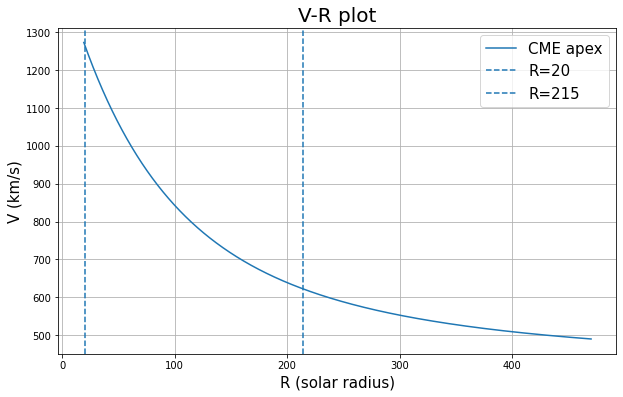

In [20]:
plt.figure(figsize=(10,6))
plt.plot(R,V,label="CME apex")
plt.axvline(x=20,linestyle="dashed",label="R=20")
plt.axvline(x=214,linestyle="dashed",label="R=215")
plt.xlabel("R (solar radius)",fontsize=15)
plt.ylabel("V (km/s)",fontsize=15)
plt.legend(fontsize=15)
plt.title("V-R plot", fontsize=20)
plt.grid()

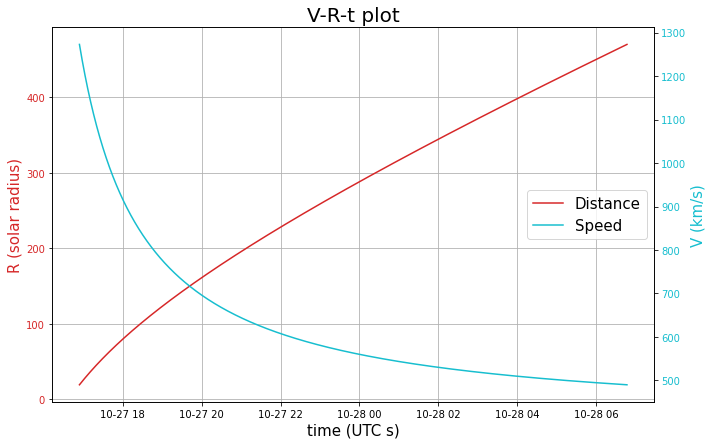

In [21]:

fig, ax1 = plt.subplots(figsize=(10,6))
plt.grid()
color = 'tab:red'
ax1.set_xlabel('time (UTC s)', fontsize=15)
ax1.set_ylabel('R (solar radius)', color=color,fontsize=15)

ax1.plot(Time, R, color=color,label="Distance")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:cyan'
ax2.set_ylabel('V (km/s)', color=color,fontsize=15)  # we already handled the x-label with ax1
ax2.plot(Time, V, color=color,label="Speed")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax1.legend(lines, labels,fontsize=15,loc=5)

plt.title("V-R-t plot", fontsize=20)
plt.show()